In [1]:
import pandas as pd

In [2]:
# read the dataset
with open('housing.data', 'r') as file:
    em_data = file.readlines() 

In [3]:
# split the data into multiple values
data = [i.strip().split() for i in em_data]

In [4]:
# create a dataframe and set the column name
df = pd.DataFrame(columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','y'])

In [5]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y


In [6]:
# Store dataset values into dataframe df
for  i in range(len(data)):
    df.loc[i] = [float(j) for j in data[i]]

In [7]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division  # import python3's division!

In [9]:
# divide data into x and y
# consider only first column (i.e 0th column) for x (small x)
x = df.iloc[:,0].values 
# consider all the columns except last column for X (for Capital X)
# this will act as different features
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
m = y.shape[0]

In [11]:
X[:3] # first 3 rows of X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [12]:
y[:3] # first 3 rows of y

array([24. , 21.6, 34.7])

# Using normal equation

In [13]:
# Using normal equation to compute theta:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y.reshape([m,1]))
theta

array([[-9.28965170e-02],
       [ 4.87149552e-02],
       [-4.05997958e-03],
       [ 2.85399882e+00],
       [-2.86843637e+00],
       [ 5.92814778e+00],
       [-7.26933458e-03],
       [-9.68514157e-01],
       [ 1.71151128e-01],
       [-9.39621540e-03],
       [-3.92190926e-01],
       [ 1.49056102e-02],
       [-4.16304471e-01]])

In [14]:
def plot_polynomial(xs,coef, color='C1'):
    ys = np.zeros_like(xs)
    for p, c in enumerate(coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, ys, color=color)

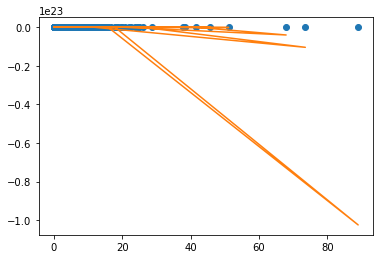

In [15]:
# See how it fits:
plt.scatter(x, y)
plot_polynomial(x, theta)
plt.show()

# Gradient Descent

In [16]:
def grad(X, y, t, m):
    g = (1/m) * np.matmul(np.transpose(X), np.matmul(X, t) - y.reshape([m,1]))
    return g.reshape(theta.shape)

In [17]:
# Initialize theta randomly:
theta2 = np.random.normal(size=X.shape[1]).reshape([X.shape[1],1])
theta2

array([[ 0.5692026 ],
       [-0.10203575],
       [-0.04907687],
       [-0.01065814],
       [ 0.10444421],
       [-0.15220729],
       [ 1.82400226],
       [-0.82712229],
       [-0.94508544],
       [-0.45680244],
       [-0.98011909],
       [-0.10038359],
       [ 0.39627394]])

In [18]:
#Gradient descent for a number of steps:
alpha = 1.0  #learning rate
for i in range(20):
    g = grad(X, y, theta2, X.shape[0])
    theta2 = theta2 - alpha*g
theta2

array([[-1.73205493e+107],
       [-3.85426314e+107],
       [-4.67107556e+107],
       [-2.64526098e+105],
       [-2.19942748e+106],
       [-2.41343105e+107],
       [-2.75733984e+108],
       [-1.38440965e+107],
       [-4.27341529e+107],
       [-1.70488127e+109],
       [-7.21088125e+107],
       [-1.37752897e+109],
       [-5.15335275e+107]])

In [19]:
theta  #Here's result from normal equation to compare

array([[-9.28965170e-02],
       [ 4.87149552e-02],
       [-4.05997958e-03],
       [ 2.85399882e+00],
       [-2.86843637e+00],
       [ 5.92814778e+00],
       [-7.26933458e-03],
       [-9.68514157e-01],
       [ 1.71151128e-01],
       [-9.39621540e-03],
       [-3.92190926e-01],
       [ 1.49056102e-02],
       [-4.16304471e-01]])

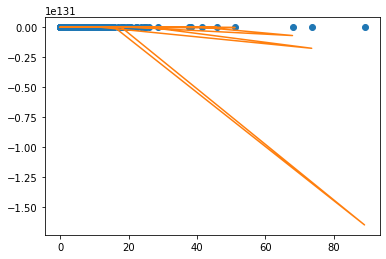

In [20]:
# See how it fits:
plt.scatter(x, y)
plot_polynomial(x, theta2)
plt.show()